# Getting the Data

In [1]:
import wrangle
import features
 
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = wrangle.get_training_data()

---Acquiring the Data---
rows: 91713, columns: 186
Selecting specfic columns to use
rows: 91713, columns: 150


---Handling Missing Values---
Filling nulls with mode for the following features:
	 * age
	 * bmi
	 * ethnicity
	 * icu_admit_source
Filling nulls with median
Handling nulls within rows
	 * Dropping patients with no recorded gender
		 - Number of patients dropped: 25
Filling nulls with 0 (aka False) for the following columns
	 * arf_apache
	 * intubated_apache
	 * cirrhosis
	 * aids
	 * diabetes_mellitus
	 * hepatic_failure
	 * immunosuppression
	 * leukemia
	 * lymphoma
	 * solid_tumor_with_metastasis
	 * hospital_death
	 * ethnicity
	 * gender
	 * age
	 * bmi
Filling nulls in the gcs data with the average (5)


---Converting Data Types---
done


In [3]:
df = features.add_gcs(df)

In [4]:
df.head()

,bmi,age,gender,ethnicity,solid_tumor_with_metastasis,lymphoma,leukemia,immunosuppression,hepatic_failure,diabetes_mellitus,aids,cirrhosis,intubated_apache,hospital_death,arf_apache,elective_surgery,icu_admit_source,icu_id,icu_stay_type,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,gcs
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25312,22.73,68,M,Caucasian,False,False,False,False,False,True,False,False,False,False,False,0,Floor,92,admit,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,1.3,1.21,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,42.8,37.0,7.392,7.34,127.0,85.0,272.666667,205.000000,66.0,55.0,68.0,63.0,68.0,63.0,119.0,108.0,90.0,74.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,136.0,112.0,131.0,115.0,131.0,115.0,39.5,37.5,3.1,3.1,0.6,0.6,18.0,18.0,8.3,8.3,1.01,1.01,140.0,134.0,23.0,23.0,11.1,11.0,33.5,33.0,1.3,1.21,2.05,2.0,181.0,181.0,4.1,4.1,139.0,138.0,12.12,12.1,42.1,41.0,7.35,7.34,120.0,107.0,223.333333,214.0,13
59342,27.42,77,F,Caucasian,False,False,False,False,False,True,False,False,False,False,False,0,Floor,90,admit,75.0,46.0,95.0,31.0,95.0,31.0,118.0,72.0,101.0,62.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,151.0,92.0,159.0,67.0,159.0,67.0,36.3,35.1,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.30,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,37.0,37.0,7.450,7.45,51.0,51.0,54.800000,51.000000,66.0,55.0,61.0,48.0,61.0,48.0,114.0,100.0,90.0,74.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,136.0,112.0,95.0,71.0,95.0,71.0,36.3,36.3,3.1,3.1,0.6,0.6,9.0,9.0,8.6,8.6,0.56,0.56,145.0,143.0,27.0,27.0,11.3,11.3,36.9,36.9,1.3,1

In [5]:
df.dtypes

bmi                            float64
age                              int32
gender                          object
ethnicity                       object
solid_tumor_with_metastasis       bool
                                ...   
h1_arterial_po2_max            float64
h1_arterial_po2_min            float64
h1_pao2fio2ratio_max           float64
h1_pao2fio2ratio_min           float64
gcs                              int32
Length: 148, dtype: object

In [6]:
df.head()

,bmi,age,gender,ethnicity,solid_tumor_with_metastasis,lymphoma,leukemia,immunosuppression,hepatic_failure,diabetes_mellitus,aids,cirrhosis,intubated_apache,hospital_death,arf_apache,elective_surgery,icu_admit_source,icu_id,icu_stay_type,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,gcs
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25312,22.73,68,M,Caucasian,False,False,False,False,False,True,False,False,False,False,False,0,Floor,92,admit,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,1.3,1.21,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,42.8,37.0,7.392,7.34,127.0,85.0,272.666667,205.000000,66.0,55.0,68.0,63.0,68.0,63.0,119.0,108.0,90.0,74.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,136.0,112.0,131.0,115.0,131.0,115.0,39.5,37.5,3.1,3.1,0.6,0.6,18.0,18.0,8.3,8.3,1.01,1.01,140.0,134.0,23.0,23.0,11.1,11.0,33.5,33.0,1.3,1.21,2.05,2.0,181.0,181.0,4.1,4.1,139.0,138.0,12.12,12.1,42.1,41.0,7.35,7.34,120.0,107.0,223.333333,214.0,13
59342,27.42,77,F,Caucasian,False,False,False,False,False,True,False,False,False,False,False,0,Floor,90,admit,75.0,46.0,95.0,31.0,95.0,31.0,118.0,72.0,101.0,62.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,151.0,92.0,159.0,67.0,159.0,67.0,36.3,35.1,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.30,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,37.0,37.0,7.450,7.45,51.0,51.0,54.800000,51.000000,66.0,55.0,61.0,48.0,61.0,48.0,114.0,100.0,90.0,74.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,136.0,112.0,95.0,71.0,95.0,71.0,36.3,36.3,3.1,3.1,0.6,0.6,9.0,9.0,8.6,8.6,0.56,0.56,145.0,143.0,27.0,27.0,11.3,11.3,36.9,36.9,1.3,1

### Examining Age

Text(0, 0.5, '# of Patients')

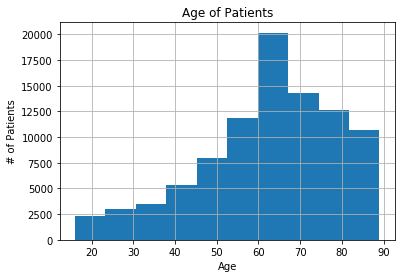

In [7]:
df.age.hist()
plt.title('Age of Patients')
plt.xlabel('Age')
plt.ylabel('# of Patients')

In [8]:
num_of_seniors = len(df[df.age > 59])
print('Percentage of ICU patients aged 60 or older:{: .2f}'.format(num_of_seniors / len(df)))

Percentage of ICU patients aged 60 or older: 0.63


In [9]:
no_age = df.age.isna().sum()
print(f'Number of patients without recorded ages: {no_age}')
print('Percentage of patients without recorded ages:{: .2f}'.format(no_age/ len(df)))

Number of patients without recorded ages: 0
Percentage of patients without recorded ages: 0.00


Solution for Age: Fill with Mode

# Explore

## Broad Strokes of All the Data

In [10]:
total_dead = df.hospital_death.sum()

In [11]:
print("{:.2%}".format(total_dead/len(df)))

8.62%


# Modeling: Bringing it All Together

## Encoding the Data

In [12]:
import preprocessing

In [13]:
cols_to_encode = [col for col in df.columns if df[col].dtype == object]

In [14]:
df = preprocessing.encode(df, cols_to_encode)

In [15]:
df.head()

,bmi,age,solid_tumor_with_metastasis,lymphoma,leukemia,immunosuppression,hepatic_failure,diabetes_mellitus,aids,cirrhosis,intubated_apache,hospital_death,arf_apache,elective_surgery,icu_id,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,gcs,gender_F,gender_M,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25312,22.73,68,False,False,False,False,False,True,False,False,False,False,False,0,92,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,1.3,1.21,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,42.8,37.0,7.392,7.34,127.0,85.0,272.666667,205.000000,66.0,55.0,68.0,63.0,68.0,63.0,119.0,108.0,90.0,74.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,136.0,112.0,131.0,115.0,131.0,115.0,39.5,37.5,3.1,3.1,0.6,0.6,18.0,18.0,8.3,8.3,1.01,1.01,140.0,134.0,23.0,23.0,11.1,11.0,33.5,33.0,1.3,1.21,2.05,2.0,181.0,181.0,4.1,4.1,139.0,138.0,12.12,12.1,42.1,41.0,7.35,7.34,120.0,107.0,223.333333,214.0,13,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
59342,27.42,77,False,False,False,False,False,True,False,False,False,False,False,0,90,75.0,46.0,95.0,31.0,95.0,31.0,118.0,72.0,101.0,62.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,151.0,92.0,159.0,67.0,159.0,67.0,36.3,35.1,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,

## Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(columns=['hospital_death'])

In [18]:
y = df.hospital_death

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

## Creating and Evaluating the Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [21]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

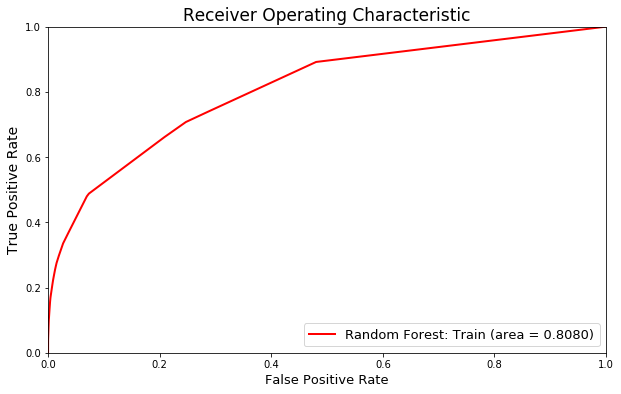

In [22]:
plt.figure(figsize=(10,6))

y_pred = tree.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
plt.plot(fpr, tpr, color='red', lw=2, label='Random Forest: Train (area = %0.4f)' % auc(fpr, tpr))

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '-', label = 'Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

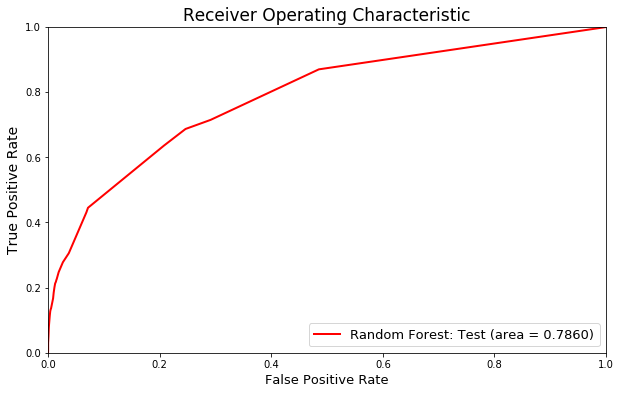

In [23]:
plt.figure(figsize=(10,6))

y_pred = tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='red', lw=2, label='Random Forest: Test (area = %0.4f)' % auc(fpr, tpr))

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '-', label = 'Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [24]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")


In [25]:
feature_list = []
importance_series = []
for feature, importance in zip(X, tree.feature_importances_):
    if importance > 0:
        feature_list.append(feature)
        importance_list.append(importance)
features_series = pd.Series(feature_list)
importance_series = pd.Series(importance_list)
df = pd.DataFrame(data=[features_series, importance_series])

NameError: name 'importance_list' is not defined

In [ ]:
df = df.T

In [ ]:
df.columns = ['feature', 'importance']

In [ ]:
df.sort_values(by='importance', ascending=False)

In [ ]:
df.drop_duplicates()